In [43]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import integrate

## Right kidney

Import data, plot activity

In [44]:
data = pandas.read_excel("Activity function.xlsx", sheet_name='Right kidney')
print(data)

   Day  Voxel value (MBq/mL)  Volume (cm3)  Activity (MBq)
0    0                599840      1.14e+00        6.81e+05
1    1                920051      1.14e+00        1.05e+06
2    4                294968      1.27e+00        3.76e+05
3    8                100335      1.27e+00        1.28e+05


Text(0, 0.5, 'Activity (MBq)')

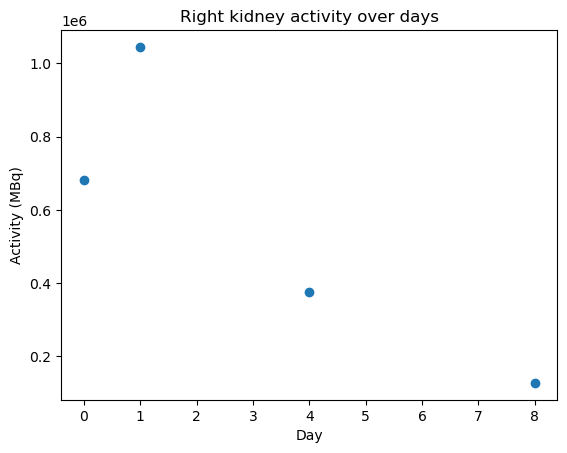

In [45]:
plt.scatter(data["Day"], data["Activity (MBq)"])
plt.title("Right kidney activity over days")
plt.xlabel("Day")
plt.ylabel("Activity (MBq)")

Fit exponential function, try the two given in the lecture and plot to see which works best.

c:\Users\bhaan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bhaan\AppData\Local\Temp\ipykernel_12244\3960709295.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_2, pcov = curve_fit(func2, data["Day"], data["Activity (MBq)"])


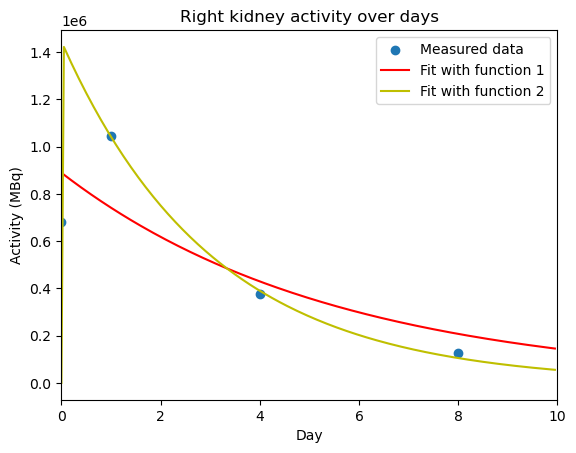

In [46]:
def func1(d, a, b):
    return a * np.exp(-b * d)

def func2(d, a, b, c):
    return a*(np.exp(-b*d) - np.exp(-c*d))

#fit for simple one
popt_1, pcov = curve_fit(func1, data["Day"], data["Activity (MBq)"])

#fit for more complex one
popt_2, pcov = curve_fit(func2, data["Day"], data["Activity (MBq)"])

#x data for plot
xes = np.arange(0,10,0.05)

#plot
plt.scatter(data["Day"], data["Activity (MBq)"], label="Measured data")
plt.plot(xes, func1(xes, *popt_1), 'r', label='Fit with function 1')
plt.plot(xes, func2(xes, *popt_2), 'y', label='Fit with function 2')
plt.title("Right kidney activity over days")
plt.xlabel("Day")
plt.ylabel("Activity (MBq)")
plt.xlim(0, 10)
plt.legend()

Integrate to find cumulative activity.

In [ ]:
#so func2 is the best fit, use that
fun = lambda d: popt_2[0]*(np.exp(-popt_2[1]*d) - np.exp(-popt_2[2]*d))
cum_act = integrate.quad(fun, 0, np.inf)
cum_act = cum_act[0]*24
print('Cumulative activity: ' + str(cum_act) + " MBq hrs")

105938010.72181734 MBq hrs


Calculate dose from mean energy, absorbed fraction, and mass.

In [ ]:
mass = 1.204945/1000
abs_frac = 1
mean_energy = 133.3*1.602e-16

Dose = (cum_act*3600*mean_energy*abs_frac)/mass
print('Dose: ' + str(Dose) + ' Gy')

## Left kidney

Import data, plot activity

In [75]:
pandas.set_option('display.float_format', '{:.2e}'.format)
pandas.Series(data=[0.0000001])
data = pandas.read_excel("Activity function.xlsx", sheet_name='Left kidney')
print(data)

   Day  Voxel value (MBq/mL)  Volume (cm3)  Activity (MBq)
0    0              5.53e+05      1.14e+00        6.28e+05
1    1              6.36e+05      1.16e+00        7.37e+05
2    4              2.78e+05      1.27e+00        3.54e+05
3    8              8.70e+04      1.27e+00        1.11e+05


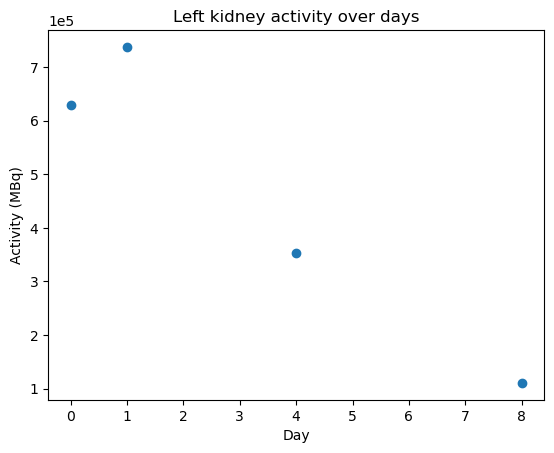

In [76]:
plt.scatter(data["Day"], data["Activity (MBq)"])
plt.title("Left kidney activity over days")
plt.xlabel("Day")
plt.ylabel("Activity (MBq)")
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

Fit exponential function, try the two given in the lecture and plot to see which works best.

c:\Users\bhaan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bhaan\AppData\Local\Temp\ipykernel_12244\628825771.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_2, pcov = curve_fit(func2, data["Day"], data["Activity (MBq)"])


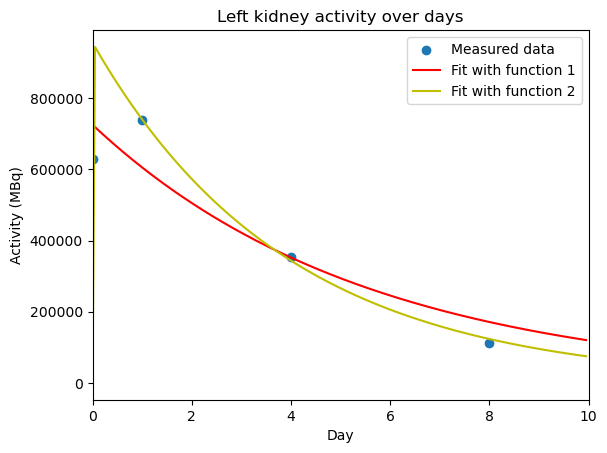

In [77]:
def func1(d, a, b):
    return a * np.exp(-b * d)

def func2(d, a, b, c):
    return a*(np.exp(-b*d) - np.exp(-c*d))

#fit for simple one
popt_1, pcov = curve_fit(func1, data["Day"], data["Activity (MBq)"])

#fit for more complex one
popt_2, pcov = curve_fit(func2, data["Day"], data["Activity (MBq)"])

#x data for plot
xes = np.arange(0,10,0.05)

#plot
plt.scatter(data["Day"], data["Activity (MBq)"], label="Measured data")
plt.plot(xes, func1(xes, *popt_1), 'r', label='Fit with function 1')
plt.plot(xes, func2(xes, *popt_2), 'y', label='Fit with function 2')
plt.title("Left kidney activity over days")
plt.xlabel("Day")
plt.ylabel("Activity (MBq)")
plt.xlim(0, 10)
plt.legend()

Integrate to find cumulative activity.

In [ ]:
#so func2 is the best fit, use that
fun = lambda d: popt_2[0]*(np.exp(-popt_2[1]*d) - np.exp(-popt_2[2]*d))
cum_act = integrate.quad(fun, 0, np.inf)
cum_act = cum_act[0]*24
print('Cumulative activity: ' + str(cum_act) + " MBq hrs")

Cumulative activity: 89652753.74958256 MBq hrs
Dose: 5.69291642840077 Gy


Calculate dose from mean energy, absorbed fraction, and mass.

In [ ]:
mass = 1.210665/1000
abs_frac = 1
mean_energy = 133.3*1.602e-16

Dose = (cum_act*3600*mean_energy*abs_frac)/mass
print('Dose: ' + str(Dose) + ' Gy')